### Analisis Sentimen Tentang "OJOl" Menggunakan Metode Naive Bayes

In [ ]:
# Import Library
import pandas as pd

In [ ]:
# Import Data
data = pd.read_excel('Indo after label.xlsx')
data

,Tweet,Label
0,dirut telkom ririek ardiansyah nninvestasi tel...,neutral
1,yuk dm juwal apk prem kak harga start kak only...,positif
2,beraakkkkk gue tukang gojek pakai motor ninja ...,neutral
3,bigna live gue gojek,positif
4,investasi telkomsel gojek merger tokopedia got...,neutral
...,...,...
21824,bapak pakai aplikasi maxim tumpang kasih helm ...,neutral
21825,abang ojol jaket gojek helm shopee motor maxim,neutral
21826,pakai maxim sih bonus kak sayang kalo pakai,positif
21827,thankyou maxim nyediain jasa pijet murah enak ...,neutral


In [ ]:
# Import Library
import matplotlib.pyplot as plt
import seaborn as sns
# Menampilkan Jumlah Label Sentimen
temp = data.groupby('Label').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Label,Tweet
1,neutral,9978
2,positif,7430
0,negatif,4420


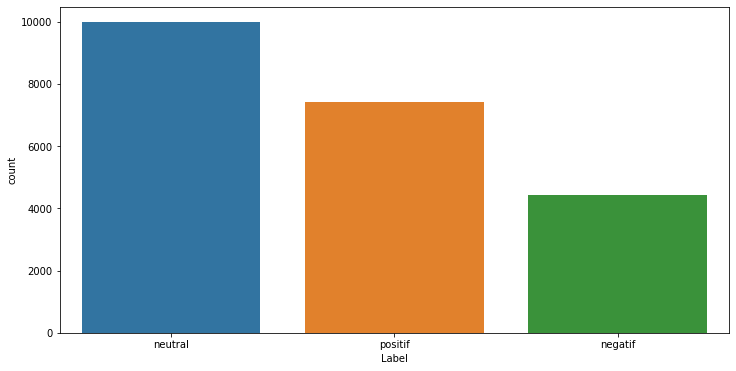

In [ ]:
# Menampilkan Jumlah Label Sentimen dalam bentuk Grafik BAR
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=data)

In [ ]:
# Menampilkan Jumlah Label Sentimen Dalam Bentuk Grafik Pie
import plotly.express as px
fig = px.pie(data, names='Label', title = 'Persentase Label Sentiment')
fig.show()

#### Kategorisasi Data

In [ ]:
# Kategorisasi Data
data = data.astype({'Label' : 'category'})
data = data.astype({'Tweet' : 'string'})
data.dtypes

Tweet      string
Label    category
dtype: object

#### Perhitungan TF-IDF

In [ ]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Perhitungan TF
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Tweet'].astype('U'))
#Perhitungan TF-IDF
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Tweet'].astype('U'))
print(text_tf)

  (0, 2767)	0.365930392190331
  (0, 9543)	0.20944827057713453
  (0, 28653)	0.21369459191431026
  (0, 17148)	0.2863960157562973
  (0, 9145)	0.07829135897288261
  (0, 27896)	0.2163932030482217
  (0, 19811)	0.41104171865324857
  (0, 1399)	0.4334228248122795
  (0, 24164)	0.3128681754830101
  (0, 27878)	0.21245224758336212
  (0, 6351)	0.3764965684822658
  (1, 5467)	0.25300314738280705
  (1, 21437)	0.17566162223049747
  (1, 26677)	0.17168017319583764
  (1, 23128)	0.2439291608719348
  (1, 892)	0.12466915122980071
  (1, 23996)	0.20959981029275773
  (1, 7764)	0.2662606119927731
  (1, 28975)	0.27771368464601465
  (1, 8519)	0.2233757606237761
  (1, 15268)	0.25902088481917296
  (1, 16662)	0.27771368464601465
  (1, 21206)	0.17089843702285462
  (1, 26820)	0.1818330239550439
  (1, 10398)	0.1219436797566837
  :	:
  (21826, 26009)	0.28428764418978203
  (21826, 12955)	0.25853742431094384
  (21826, 21558)	0.4953148689357079
  (21826, 12835)	0.2733023151881261
  (21827, 22454)	0.4727846996097244
  (21827,

In [ ]:
# Melihat Hasil Letak Sebuah Kata
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaa',
 'aaaaaaannbersyukur',
 'aaaak',
 'aaaakkkk',
 'aaaf',
 'aaahhhh',
 'aaakkkk',
 'aaakkkkkk',
 'aaapa',
 'aaarghhh',
 'aab',
 'aadan',
 'aah',
 'aajsjsjjs',
 'aaminn',
 'aampw',
 'aan',
 'aangkot',
 'aap',
 'aapa',
 'aapaan',
 'aarghhh',
 'aargrghhg',
 'aaron',
 'aati',
 'aatin',
 'aaui',
 'aavvvv',
 'aaya',
 'ab',
 'aba',
 'abaaba',
 'abad',
 'abadi',
 'abag',
 'abah',
 'abahennig',
 'abahnnaamiinn',
 'abai',
 'abal',
 'abam',
 'abang',
 'abangabang',
 'abangda',
 'abangg',
 'abangna',
 'abangnua',
 'abangny',
 'abangque',
 'abank',
 'abanng',
 'abantu',
 'abawa',
 'abay',
 'abaya',
 'abdi',
 'abdillah',
 'abdul',
 'abe',
 'abeh',
 'abelanja',
 'abesan',
 'abgny',
 'abgpakcik',
 'abhi',
 'abi',
 'abiezzz',
 'abih',
 'abis',
 'abisabis',
 'abisabisan',
 'abisin',
 'abisni',
 'abisnmau',
 'abistu',
 'abit',
 'abjs',
 'able',
 'abng',
 'abngnya',
 'abochi',
 'abotnya'

In [ ]:
# Melihat hasil kalkulasi dari TF-IDF dalam sebuah kata
text_tf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Ubah Data TF-IDF ke dalam bentuk DataFrame
df = pd.DataFrame(text_tf.todense().T,
                  index=vectorizer.get_feature_names(),
                  columns=[f'D{i+1}' for i in range(len(data))])
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D21820,D21821,D21822,D21823,D21824,D21825,D21826,D21827,D21828,D21829
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaaaaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzzzzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split Data
Tujuan Split data untuk membagi data training dan data testing
data testing = 0.1, Data Training = 0.9

In [ ]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Label'], test_size=0.1, random_state=33)
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (19646, 31257)
X_test_shape :  (2183, 31257)
y_train_shape :  (19646,)
y_test_shape :  (2183,)


#### Model Prediksi Sentimen Dengan Metode Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
from sklearn.naive_bayes import ComplementNB
model_naive = ComplementNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

In [ ]:
# Print hasil Prediksi
predicted_naive

array(['neutral', 'neutral', 'negatif', ..., 'negatif', 'positif',
       'negatif'], dtype='<U7')

#### Confusion Matriks Metode Naive Bayes

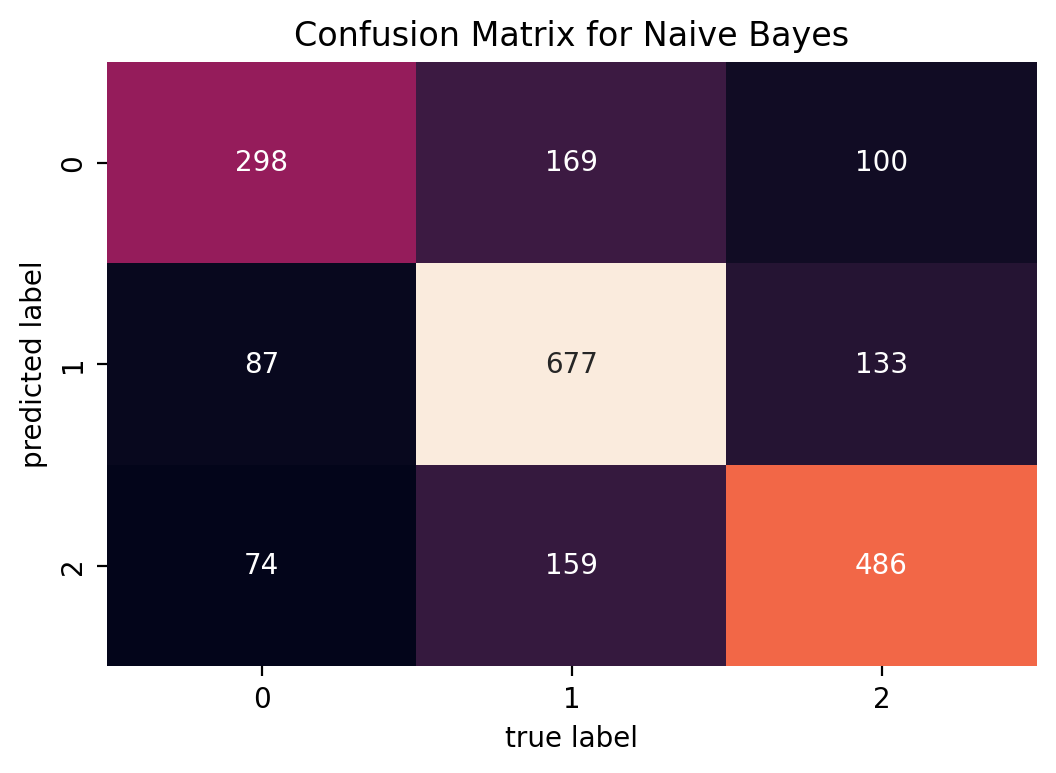

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

plt.figure(dpi=200)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#### Evaluasi Model Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

score_naive = accuracy_score(predicted_naive, y_test)
print(classification_report(y_test, predicted_naive))
print("Accuracy with Naive-bayes: ",score_naive)

              precision    recall  f1-score   support

     negatif       0.53      0.65      0.58       459
     neutral       0.75      0.67      0.71      1005
     positif       0.68      0.68      0.68       719

    accuracy                           0.67      2183
   macro avg       0.65      0.67      0.66      2183
weighted avg       0.68      0.67      0.67      2183

Accuracy with Naive-bayes:  0.6692624828218049


#### Testing Prediksi Model Naive Bayes

In [ ]:
# Input kalimat teks
kalimat_tes = ["gojek bagus" ]

In [ ]:
# definisikan nama label
nama_label = ["positif","negatif","neutral"]

In [ ]:
#Loop untuk prediksi
for teks in kalimat_tes:
    arr_teks = []
    arr_teks.append(teks)
    vektor = vectorizer.transform(arr_teks)
    prediksi_label_Naive_Bayes= model_naive.predict(vektor)

In [ ]:
prediksi_label_Naive_Bayes

array(['positif'], dtype='<U7')